# Graph generator for the fully autonomous multistep synthesis in AEON

## Import package and define node colors

In [1]:
from Graph import Graph
import networkx as nx
import json
g = Graph()
# Colors for nodes in visualize the graphs
COLOR1= g.convert_to_hex([128/255,179/255,255/255])
COLOR2= g.convert_to_hex([255/255,85/255,153/255])

## Creating a synthesis graph

### Step 1: Define the synthetic conditions

In [2]:
# experimental information for the six nanoparticles to be reproduced
exp_info = json.load(open('exp_info.json'))

## Step 2: define their hierarchical relations and create the synthesis graph

In [3]:
# create a synthesis graph 
max_offspring_num = 3 # how many reactions one vial can seed
G_C = nx.DiGraph() # define a networkx graph object
G_C.add_nodes_from(range(6+1)) # define 6 experiments plus the root node
nx.set_node_attributes(G_C, True, "UV_Vis") # set the default UV-Vis
nx.set_node_attributes(G_C, 2, "number") # set the default residual number
nx.set_node_attributes(G_C, 0, "offspring") # this varaible has to be initialized as 0

# define the multistep synthesis for the whole synthesis
G_C.add_edge(0, 1) 
G_C.add_edge(0, 2)
G_C.add_edge(1, 3)
G_C.add_edge(1, 4)
G_C.add_edge(3, 5)
G_C.add_edge(3, 6)
G_C.nodes[1]["number"] = 0
G_C.nodes[3]["number"] = 0

# Initialize the synthesis graph
G_C = g.initialize_synthesis_Graph(G_C,max_offspring_num,exp_info)

## Step 3: Generate the reaction graph from the synthesis graph

In [4]:
# define the chemical reactoin graph from the synthesis graph
G = g.initialize_reaction_Graph(G_C,max_offspring_num)

## Step 4: Generate the hardware graph from the reaction graph

In [5]:
# generate the hardware graph, and the reaction graph was also updated in this process
G_skl,G = g.initialize_hardware_Graph(G)

## Plot the synthesis graph 

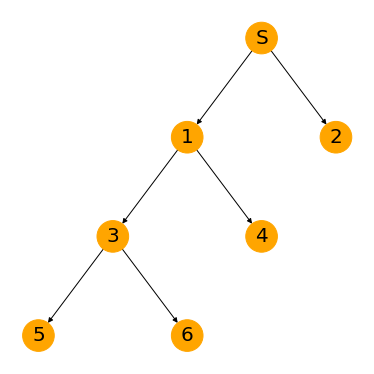

In [6]:
G_C_plot = G_C.copy()
G_C_plot = nx.relabel_nodes(G_C_plot, {0:'S'})
g.plot_reaction_Graph(G_C_plot,False,'Orange',COLOR2,file_path='synthesis_graph')

## Plot the reaction graph

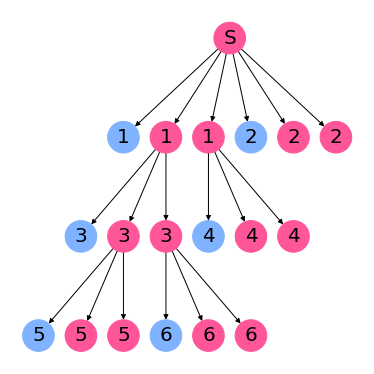

In [7]:
G_plot = G.copy()
first_generation = [node for node in G_plot.nodes() if len([i for i in G_plot.predecessors(node)])==0]
G_plot.add_node('S')
G_plot.nodes['S']['UV_Vis'] = False
G_plot.nodes['S']['exp'] = 'S'
for node in first_generation:
    G_plot.add_edge('S',node)
g.plot_reaction_Graph(G_plot,True,COLOR1,COLOR2,file_path='reaction_graph')

## Plot the hardware graph

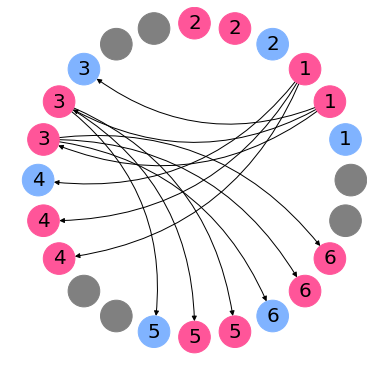

In [8]:
# Plot the hardware graph
g.plot_hardware_Graph(G_skl,G,COLOR1,COLOR2,file_path='hardware_graph')

## Output Three Graphs 

In [9]:
nx.write_gpickle(G_C, "./Graphs/synthesis_graph.gpickle") # Output the synthesis graph
nx.write_gpickle(G, "./Graphs/reaction_graph.gpickle") # Output the reaction graph
nx.write_gpickle(G_skl, "./Graphs/harware_graph.gpickle") # Output the hardware graph